<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Hypothesis Testing 2-Proportion Z test </h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

### Problem Statement

     Fantaloons Sales managers commented that % of males versus females walking in to the store differ based on day of the week. Analyze the data and determine whether there is evidence at 5 % significance level to support this hypothesis.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import math
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

data = pd.read_csv('Faltoons.csv')
data

,Weekdays,Weekend
0,Male,Female
1,Female,Male
2,Female,Male
3,Male,Female
4,Female,Female
5,Female,Male
6,Female,Female
7,Female,Male
8,Female,Female
9,Female,Male


In [3]:
pd.crosstab(data.Weekdays, data.Weekend)

Weekend,Female,Male
Weekdays,,
Female,167,120
Male,66,47


In [4]:
df  = data.replace(to_replace = {'Female':0, 'Male':1})

In [5]:
df

,Weekdays,Weekend
0,1,0
1,0,1
2,0,1
3,1,0
4,0,0
5,0,1
6,0,0
7,0,1
8,0,0
9,0,1


In [6]:
df.shape

(400, 2)

In [18]:
df.Weekdays.value_counts(normalize = True), df.Weekdays.value_counts(normalize = False)

(0    0.7175
 1    0.2825
 Name: Weekdays, dtype: float64,
 0    287
 1    113
 Name: Weekdays, dtype: int64)

In [19]:
df.Weekend.value_counts(normalize = True), df.Weekend.value_counts(normalize = False)

(0    0.5825
 1    0.4175
 Name: Weekend, dtype: float64,
 0    233
 1    167
 Name: Weekend, dtype: int64)

In [20]:
df.Weekdays.mean()

0.2825

### Ho : P1 - P2 = 0

### HA: P1 - P2! = 0 

In [25]:
n1 = 400 #sample size
n2 = 400 #sample size
x1 = 287 # occurances
x2 = 233 # occurances
p1 = 0.7175  #proportion
p2 = 0.5825  #proportion
p = (287+233)/(400+400) #pool proportion
p

0.65

### Number of Observation is over 30 so we le clt to the magic and use Z distribution

In [17]:
z_critical  = 0.025+0.95
stats.norm.ppf(0.975)

1.959963984540054

### Z statistic

In [27]:
z_statistic = ((p1-p2)-(0))/math.sqrt(p*(1-p)*((1/400) + (1/400)))
z_statistic

4.002746309969947

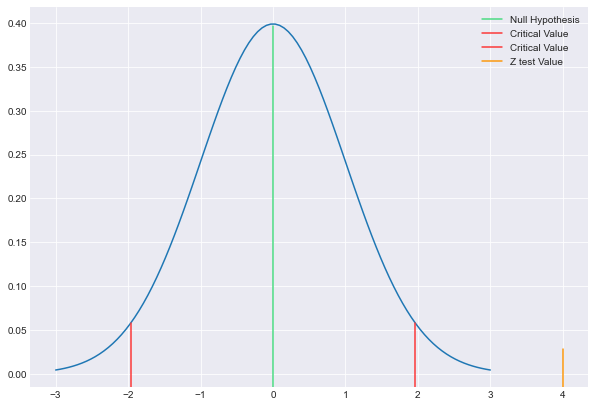

In [30]:
plt.figure(figsize=(10,7))

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

xs = [0,0.17]

plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(x = 0, ymin = 0, ymax = 0.95, label = 'Null Hypothesis', color = '#4adb82')
plt.axvline(x = -1.959963984540054, ymin = 0, ymax = max(xs), label = 'Critical Value', color = '#fc3737')
plt.axvline(x = 1.959963984540054, ymin = 0, ymax = max(xs), label = 'Critical Value', color = '#fc3737')
plt.axvline(x = z_statistic, ymin = 0, ymax = 0.10, label = 'Z test Value', color = '#fc980c')
plt.legend()
plt.show()

the test value is in rejetion region 

### We reject the Null hypothesis

In [34]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [35]:
t2, p2 = ttest_ind_from_stats(a, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)

NameError: name 'abar' is not defined